<a href="https://colab.research.google.com/github/EliRub1/Introduction-to-Cloud-Computing/blob/main/ItCC_Tut1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello world")

Hello world


In [ ]:
!pip install numpy

In [ ]:
import time
print(time.ctime())



Wed Mar 19 08:58:13 2025


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

'Copy of tir1.ipynb'   tir1.ipynb


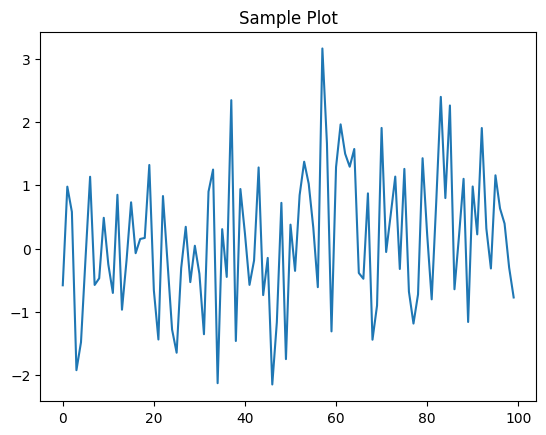

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

y = np.random.randn(100)
x = [x for x in range(len(y))]

plt.plot(x, y, '-')
plt.fill_between(x, y, 200, where = (y > 195), facecolor='g', alpha=0.6)

plt.title("Sample Plot")
plt.show()


In [ ]:
# @title Default title text
name1 = "james" # @param {"type":"string","placeholder":"aaa"}
variable_name = 95 # @param {"type":"slider","min":0,"max":100,"step":1}
variable_name2 = "1" # @param ["1","2","3"]


In [ ]:
print(name1)

james


In [ ]:
#@title Default title text
%%html
<style>
body {
  background-color: #f2bcca;
}
</style>
color = 'red' #@param ["red", "green", "blue"] print(color)
<svg xmlns="https://www.w3.org/2000/svg" viewBox="0 0 600 400" width="400" height="400">
   <rect x="10" y="00" width="300" height="100" rx="0" style="fill:orange; stroke:black; fill-opacity:1.0" />
   <rect x="10" y="100" width="300" height="100" rx="0" style="fill:white; stroke:black; fill-opacity:1.0;" />
   <rect x="10" y="200" width="300" height="100" rx="0" style="fill:green; stroke:black; fill-opacity:1.0;" />
</svg>


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
with open('1.txt', 'r') as file:
    contents = file.read()
    print(contents)


One
Two
Three


In [ ]:
with open('example.txt', 'a') as file:
    file.write('\nThis is some example text.')


In [ ]:
import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    with open('/content/drive/My Drive/1.txt', 'r') as file:
      contents = file.read()
      print(contents)

button.on_click(on_button_clicked)
display(button, output)


Button(description='Click Me!', style=ButtonStyle())

Output()

In [ ]:
import ipywidgets as widgets
slider = widgets.IntSlider(value=5, max=10)
display(slider)



IntSlider(value=5, max=10)

**Targil kita**



In [ ]:
with open('Students.txt', 'w') as file:
    file.write('Eli Rubinov Eli.Rubinov@e.braude.ac.il.\nTony Hawk Tony.hawk@e.braude.ac.il\nTony Montana Tony.Montana@e.braude.ac.il')


In [ ]:
with open('students.txt', 'r') as file:
    contents = file.read()
    print(contents)
    #students_cont=contents.split()
    #print(students_cont)

Name:Tony Hawk ,Email:Tony.hawk@e.braude.ac.il,Courses:algebra,OS,Math,Link:www.google.com  
Name:Tony Montana ,Email:Tony.Montana@e.braude.ac.il,Courses:calc,logics,Link:www.fxp.co.il  

Name:Tony Hawk, Email:Tony.hawk@e.braude.ac.il, Courses:algebra, Link:www.google.com, Favorite Program:comps
Name:Tony Montana, Email:Tony.Montana@e.braude.ac.il, Courses:calc, logics, Link:www.fxp.co.il, Favorite Program:idk2
Name:Tony Montana, Email:Tony.Montana@e.braude.ac.il, Courses:calc, logics, Link:www.fxp.co.il, Favorite Program:traficing


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# קריאת נתונים מהקובץ students.txt
file_path = "students.txt"

def read_students():
    students = {}
    with open(file_path, "r") as f:
        for line in f:
            parts = [p.strip() for p in line.strip().split(",")]  # הסרת רווחים
            student_info = {}

            current_key = None
            for part in parts:
                if ":" in part:  # בדיקה אם זה שדה חדש
                    key, value = part.split(":", 1)
                    current_key = key.strip().lower()
                    student_info[current_key] = value.strip()
                else:
                    # אם זה לא שדה חדש וזה חלק מהקורסים, נוסיף אותו לרשימה
                    if current_key == "courses":
                        student_info[current_key] += f", {part.strip()}"

            # הפיכת הקורסים לרשימה
            if "courses" in student_info:
                student_info["courses"] = [course.strip() for course in student_info["courses"].split(",")]

            if "name" in student_info:
                name = student_info["name"]
                students[name] = student_info
                students[name]["favorite program"] = ""  # ברירת מחדל לתוכנית אהובה
            else:
                print(f"⚠ שורה לא תקינה בקובץ: {line}")  # הדפסה למעקב אחר בעיות

    return students

students_dict = read_students()
print(f"📌 Loaded Students: {students_dict}")  # Debugging

# יצירת Dropdown עם שמות הסטודנטים
dropdown = widgets.Dropdown(
    options=list(students_dict.keys()) if students_dict else ["No students found"],
    description="Student:",
)

# יצירת תיבות טקסט להצגת נתוני הסטודנט
email_box = widgets.Text(description="Email:", disabled=True)
courses_box = widgets.Text(description="Courses:", disabled=True)
link_box = widgets.Text(description="Link:", disabled=True)
fav_prog_box = widgets.Text(description="Favorite Program:")

# כפתור לעדכון התוכנית האהובה
update_button = widgets.Button(description="Update")
output = widgets.Output()

# עדכון השדות בעת בחירת סטודנט
def update_fields(change):
    student_name = dropdown.value
    if student_name not in students_dict:
        return

    student = students_dict[student_name]

    email_box.value = student.get("email", "N/A")

    # הצגת רשימת הקורסים בצורה תקינה
    courses_box.value = ", ".join(student.get("courses", [])) if isinstance(student.get("courses"), list) else student.get("courses", "N/A")

    link_box.value = student.get("link", "N/A")
    fav_prog_box.value = student.get("favorite program", "")

dropdown.observe(update_fields, names="value")

# פונקציה לעדכון המידע בקובץ
def update_file(b):
    student_name = dropdown.value
    favorite_program = fav_prog_box.value.strip()

    if not favorite_program:
        return  # לא לעדכן אם השדה ריק

    students_dict[student_name]["favorite program"] = favorite_program  # עדכון מבנה הנתונים

    with open(file_path, "a") as f:
        f.write(f"\nName:{student_name}, Email:{students_dict[student_name]['email']}, Courses:{', '.join(students_dict[student_name]['courses'])}, Link:{students_dict[student_name]['link']}, Favorite Program:{favorite_program}")

    with output:
        clear_output()
        print(f"✅ Updated {student_name} with Favorite Program: {favorite_program}")

update_button.on_click(update_file)

# הצגת הטופס
display(dropdown, email_box, courses_box, link_box, fav_prog_box, update_button, output)


⚠ שורה לא תקינה בקובץ: 

📌 Loaded Students: {'Tony Hawk': {'name': 'Tony Hawk', 'email': 'Tony.hawk@e.braude.ac.il', 'courses': ['algebra'], 'link': 'www.google.com', 'favorite program': ''}, 'Tony Montana': {'name': 'Tony Montana', 'email': 'Tony.Montana@e.braude.ac.il', 'courses': ['calc', 'logics'], 'link': 'www.fxp.co.il', 'favorite program': ''}}


Dropdown(description='Student:', options=('Tony Hawk', 'Tony Montana'), value='Tony Hawk')

Text(value='', description='Email:', disabled=True)

Text(value='', description='Courses:', disabled=True)

Text(value='', description='Link:', disabled=True)

Text(value='', description='Favorite Program:')

Button(description='Update', style=ButtonStyle())

Output()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

file_path = "students.txt"

def read_students():
    students = {}
    with open(file_path, "r") as f:
        for line in f:
            parts = [p.strip() for p in line.strip().split(",")]
            student_info = {k.strip().lower(): v.strip() for p in parts if ":" in p for k, v in [p.split(":", 1)]}
            if "name" in student_info:
                student_info["courses"] = student_info.get("courses", "").split(", ")
                students[student_info["name"]] = student_info
                students[student_info["name"]].setdefault("favorite program", "")
    return students

students_dict = read_students()

dropdown = widgets.Dropdown(options=list(students_dict) or ["No students"], description="Student:")
email_box = widgets.Text(description="Email:", disabled=True)
courses_box = widgets.Text(description="Courses:", disabled=True)
link_box = widgets.Text(description="Link:", disabled=True)
fav_prog_box = widgets.Text(description="Favorite Program:")
update_button = widgets.Button(description="Update")
output = widgets.Output()

def update_fields(change):
    student = students_dict.get(dropdown.value, {})
    email_box.value = student.get("email", "N/A")
    courses_box.value = ", ".join(student.get("courses", []))
    link_box.value = student.get("link", "N/A")
    fav_prog_box.value = student.get("favorite program", "")

dropdown.observe(update_fields, names="value")

def update_file(b):
    student_name = dropdown.value
    if student_name in students_dict and fav_prog_box.value.strip():
        students_dict[student_name]["favorite program"] = fav_prog_box.value.strip()
        with open(file_path, "w") as f:
            for s in students_dict.values():
                f.write(f"Name:{s['name']}, Email:{s.get('email', 'N/A')}, Courses:{', '.join(s.get('courses', []))}, Link:{s.get('link', 'N/A')}, Favorite Program:{s.get('favorite program', '')}\n")
        with output:
            clear_output()
            print(f"✅ Updated {student_name}")

update_button.on_click(update_file)

display(dropdown, email_box, courses_box, link_box, fav_prog_box, update_button, output)


Dropdown(description='Student:', options=('Tony Hawk', 'Tony Montana'), value='Tony Hawk')

Text(value='', description='Email:', disabled=True)

Text(value='', description='Courses:', disabled=True)

Text(value='', description='Link:', disabled=True)

Text(value='', description='Favorite Program:')

Button(description='Update', style=ButtonStyle())

Output()